<a href="https://colab.research.google.com/github/BandiniThomas/be_machine_learning/blob/main/BE_BANDINI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ls

dataset.csv  sample_data


In [ ]:
import pandas as pd
df = pd.read_csv("dataset.csv")
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40.0,155,60.0,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40.0,160,60.0,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55.0,170,60.0,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40.0,165,70.0,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40.0,155,60.0,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [ ]:
noms_colonnes = df.columns

print("Liste des noms des colonnes :")
print(noms_colonnes)


print(len(df));

total_nulls = df.isnull().sum().sum()

print(total_nulls);

Liste des noms des colonnes :
Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')
55702
12


**1.1**

Les colonnes correspondent aux données biologique des patients:
'ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries', 'tartar', 'smoking'

Il y a 55702 entrées dans le jeu de données.

Il y a 12 entrées nulles dans le jeu de donnée.

In [ ]:
fumeurs = df[df['smoking'] == 1]

print("La moyenne d'age des patients fumeurs :", fumeurs['age'].mean())
print("La moyenne de taille des patients fumeurs :", fumeurs['height(cm)'].mean())
print("La moyenne de poids des patients fumeurs :", fumeurs['weight(kg)'].mean())

limite_age = 110

ages_aberrants = df[df['age'] > limite_age]

print("Enregistrements avec des âges aberrants :" )
print(ages_aberrants)

print("l'écart type de l'hemoglobine est :")
print((df['hemoglobin'].std()))



La moyenne d'age des patients fumeurs : 43.560813453265546
La moyenne de taille des patients fumeurs : 169.4354010852031
La moyenne de poids des patients fumeurs : 70.95937622213532
Enregistrements avec des âges aberrants :
          ID gender      age  height(cm)  weight(kg)  waist(cm)  \
55692  55681      F    180.0         160        50.0       70.0   
55693  55683      F   1200.0         160        50.0       68.5   
55694  55684      M   3000.0         165        60.0       78.0   
55695  55691      M  40000.0         160        65.0       85.0   

       eyesight(left)  eyesight(right)  hearing(left)  hearing(right)  ...  \
55692             1.2              1.2            1.0             1.0  ...   
55693             1.0              1.2            1.0             1.0  ...   
55694             0.8              1.0            1.0             1.0  ...   
55695             0.9              0.7            1.0             1.0  ...   

       hemoglobin  Urine protein  serum creatinin

**1.2**

La moyenne d'age des patients fumeurs : 43.56 ans

La moyenne de taille des patients fumeurs : 169.43 cm

La moyenne de poids des patients fumeurs : 70.95 kg

Les patients 55681 (180 ans), 55683 (1200 ans), 55684 (3000 ans), 55691 (40000 ans) ont des ages aberrants   

l'écart type de l'hemoglobine est :
1.564

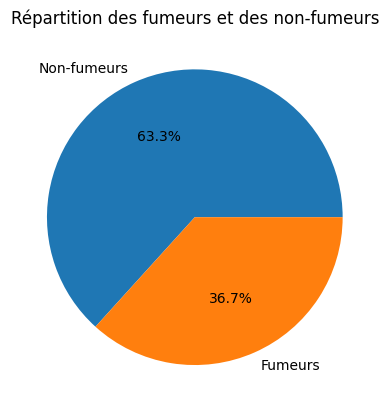

In [ ]:
import matplotlib.pyplot as plt

counts = df['smoking'].value_counts()

labels = ['Non-fumeurs', 'Fumeurs']
sizes = [counts[0], counts[1]]


plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Répartition des fumeurs et des non-fumeurs')


plt.show()

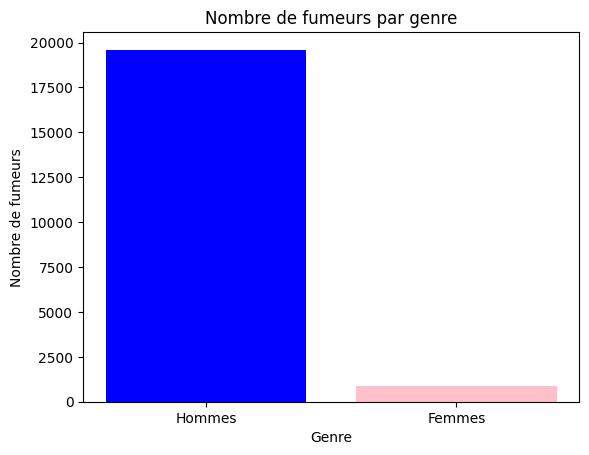

In [ ]:
hommes_fumeurs = df[(df['gender'] == 'M') & (df['smoking'] == 1)].shape[0]
femmes_fumeuses = df[(df['gender'] == 'F') & (df['smoking'] == 1)].shape[0]


categories = ['Hommes', 'Femmes']
nombre_fumeurs = [hommes_fumeurs, femmes_fumeuses]

plt.bar(categories, nombre_fumeurs, color=['blue', 'pink'])
plt.xlabel('Genre')
plt.ylabel('Nombre de fumeurs')
plt.title('Nombre de fumeurs par genre')
plt.show()

In [ ]:
# Filtrer les données pour les hommes fumeurs
hommes_fumeurs = df[(df['gender'] == 'M') & (df['smoking'] == 1)]

# Calculer la moyenne d'âge des hommes fumeurs
moyenne_age_hommes_fumeurs = hommes_fumeurs['age'].mean()

print(moyenne_age_hommes_fumeurs)

43.437005664132265


La moyenne d'age des hommes fumeurs est 43.4 ans

In [ ]:
df.corr()

ValueError: could not convert string to float: 'F'

Il y a une erreur


**Partie 2**

La méthode d'imputation par la moyenne/médiane semble plus appropriée car elle est simple d'utilisation et ne supprime pas de données.

la moyenne/médiane remplace les valeurs manquantes par la moyenne ou la médiane de la colonne correspondante

Ici, on a rajouté des lignes permettants de prendre en compte des valeurs string qu'il y avait dans les données.



In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# méthode d'imputation par la moyenne
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns


numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# OneHotEncoder :

colonnes = ['tartar', 'gender', 'oral']
encoder = OneHotEncoder(drop='first', sparse=False)
encoded = encoder.fit_transform(df[colonnes])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(colonnes))

df_imputed = df.drop(columns=colonnes).reset_index(drop=True)
df_encoded = pd.concat([df_imputed, encoded_df], axis=1)

df_encoded.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,tartar_Y,gender_M
0,0.0,40.0,155.0,60.0,81.3,1.2,1.0,1.0,1.0,114.0,...,12.9,1.0,0.7,18.0,19.0,27.0,0.0,0.0,1.0,0.0
1,1.0,40.0,160.0,60.0,81.0,0.8,0.6,1.0,1.0,119.0,...,12.7,1.0,0.6,22.0,19.0,18.0,0.0,0.0,1.0,0.0
2,2.0,55.0,170.0,60.0,80.0,0.8,0.8,1.0,1.0,138.0,...,15.8,1.0,1.0,21.0,16.0,22.0,0.0,1.0,0.0,1.0
3,3.0,40.0,165.0,70.0,88.0,1.5,1.5,1.0,1.0,100.0,...,14.7,1.0,1.0,19.0,26.0,18.0,0.0,0.0,1.0,1.0
4,4.0,40.0,155.0,60.0,86.0,1.0,1.0,1.0,1.0,120.0,...,12.5,1.0,0.6,16.0,14.0,22.0,0.0,0.0,0.0,0.0


Nous aurions pu faire une imputation des valeurs manquantes ou une normalisation

# **Partie 3**

In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['smoking'])
y = df_encoded['smoking']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(44561, 25)
(11141, 25)
(44561,)
(11141,)


Nous avons choisit 20% des données pour l'entrainement et 80% des données pour le test.

Il est important de diviser les données pour ne pas biaiser les résultats en utilisant les mêmes données pour l'entrainement et le test.

# 3.2

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

         0.0       0.81      0.78      0.79      6977
         1.0       0.65      0.69      0.67      4164

    accuracy                           0.75     11141
   macro avg       0.73      0.73      0.73     11141
weighted avg       0.75      0.75      0.75     11141



Voici les résultats :

              precision    recall  f1-score   support

         0.0       0.81      0.78      0.79      6977
         1.0       0.65      0.69      0.67      4164

    accuracy                           0.75     11141

# 3.3

Arbre de décision :

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


dt_model = DecisionTreeClassifier(random_state=42)


param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

best_dt_model = grid_search.best_estimator_
best_dt_model.fit(X_train_scaled, y_train)


y_pred = best_dt_model.predict(X_test_scaled)

report = classification_report(y_test, y_pred)
print(report)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best hyperparameters: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

         0.0       0.81      0.82      0.82      6977
         1.0       0.69      0.69      0.69      4164

    accuracy                           0.77     11141
   macro avg       0.75      0.75      0.75     11141
weighted avg       0.77      0.77      0.77     11141



Les meilleurs hyperparamètres sont : {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}

voici les résultats :

              precision    recall  f1-score   support

         0.0       0.81      0.82      0.82      6977
         1.0       0.69      0.69      0.69      4164

    accuracy                           0.77     11141


KNN :

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définir le modèle KNN
knn_model = KNeighborsClassifier()

# Définir la grille d'hyperparamètres à rechercher
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Utiliser GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Afficher les meilleurs hyperparamètres
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Entraîner le modèle avec les meilleurs hyperparamètres
best_knn_model = grid_search.best_estimator_
best_knn_model.fit(X_train_scaled, y_train)

# Prédictions sur l'ensemble de test
y_pred = best_knn_model.predict(X_test_scaled)

# Évaluation du modèle
report = classification_report(y_test, y_pred)
print(report)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84      6977
         1.0       0.73      0.72      0.72      4164

    accuracy                           0.79     11141
   macro avg       0.78      0.78      0.78     11141
weighted avg       0.79      0.79      0.79     11141



les meilleurs paramètres sont : {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

les résultats :

              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84      6977
         1.0       0.73      0.72      0.72      4164

    accuracy                           0.79     11141

# Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from scipy.stats import randint

# Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définir le modèle de forêt aléatoire
rf_model = RandomForestClassifier(random_state=42)

# Définir la grille d'hyperparamètres à rechercher
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'criterion': ['gini', 'entropy']
}

# Utiliser RandomizedSearchCV pour trouver les meilleurs hyperparamètres
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=3, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train_scaled, y_train)

# Afficher les meilleurs hyperparamètres
best_params = random_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Entraîner le modèle avec les meilleurs hyperparamètres
best_rf_model = random_search.best_estimator_
best_rf_model.fit(X_train_scaled, y_train)

# Prédictions sur l'ensemble de test
y_pred = best_rf_model.predict(X_test_scaled)

# Évaluation du modèle
report = classification_report(y_test, y_pred)
print(report)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best hyperparameters: {'criterion': 'gini', 'max_depth': 28, 'min_samples_leaf': 7, 'min_samples_split': 4, 'n_estimators': 558}
              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84      6977
         1.0       0.72      0.77      0.75      4164

    accuracy                           0.80     11141
   macro avg       0.79      0.80      0.79     11141
weighted avg       0.81      0.80      0.81     11141



les meilleurs paramètres sont : {'criterion': 'gini', 'max_depth': 28, 'min_samples_leaf': 7, 'min_samples_split': 4, 'n_estimators': 558}

résultats :

              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84      6977
         1.0       0.72      0.77      0.75      4164

    accuracy                           0.80     11141

# SVM :

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définir le modèle SVM
svm_model = SVC(random_state=42)

# Définir la grille d'hyperparamètres à rechercher
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'criterion': ['gini', 'entropy']
}

# Utiliser RandomizedSearchCV pour trouver les meilleurs hyperparamètres
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=3, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train_scaled, y_train)

# Afficher les meilleurs hyperparamètres
best_params = random_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Entraîner le modèle avec les meilleurs hyperparamètres
best_svm_model = random_search.best_estimator_
best_svm_model.fit(X_train_scaled, y_train)

# Prédictions sur l'ensemble de test
y_pred = best_svm_model.predict(X_test_scaled)

# Évaluation du modèle
report = classification_report(y_test, y_pred)
print(report)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best hyperparameters: {'criterion': 'gini', 'max_depth': 28, 'min_samples_leaf': 7, 'min_samples_split': 4, 'n_estimators': 558}
              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84      6977
         1.0       0.72      0.77      0.75      4164

    accuracy                           0.80     11141
   macro avg       0.79      0.80      0.79     11141
weighted avg       0.81      0.80      0.81     11141



Les meilleurs paramètres sont : {'criterion': 'gini', 'max_depth': 28, 'min_samples_leaf': 7, 'min_samples_split': 4, 'n_estimators': 558}    

résultats :    

              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84      6977
         1.0       0.72      0.77      0.75      4164

    accuracy                           0.80     11141


L'ajustement des paramètres modifie la précision du modèle.

# 3.4

Les modèles SVM et Random forest sont les modèles les plus précis.